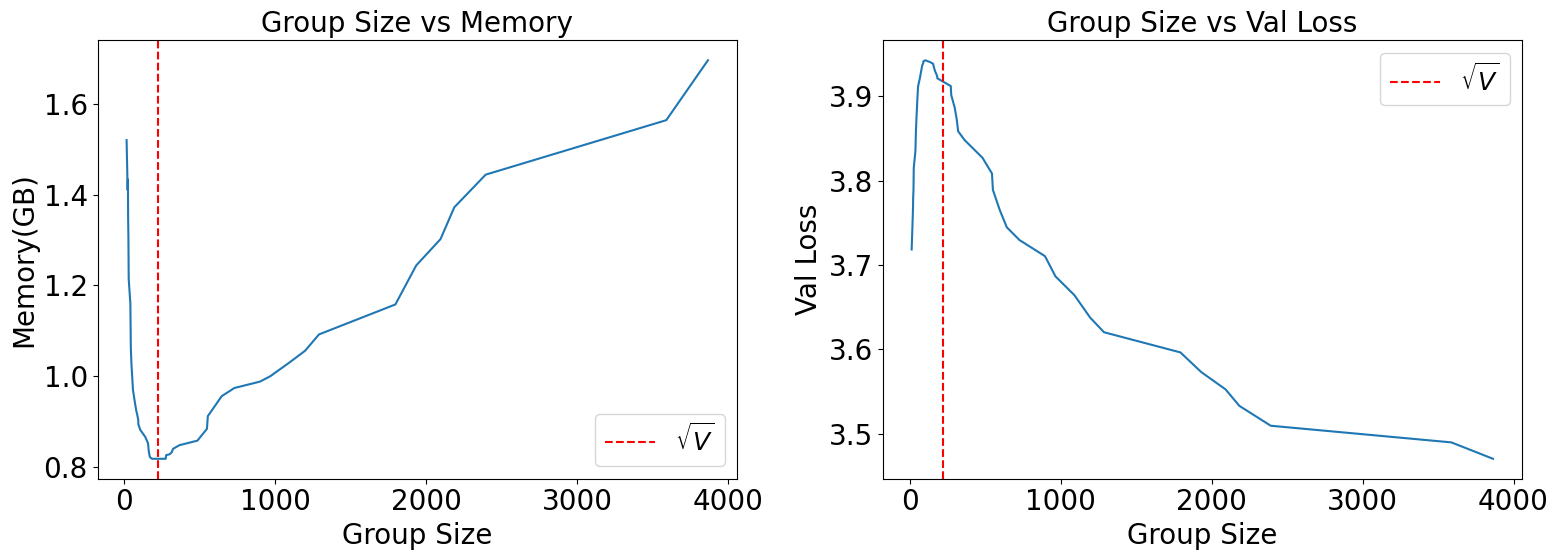

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

fnt_size = 20

plt.rcParams.update({'font.size': fnt_size})

with open("mem_group.txt", "r") as f:
    mem_line_list = f.readlines()

mem_X = [int(x.split(':')[0]) for x in mem_line_list]
mem_Y = [float(x.split(':')[1].strip('\n')) for x in mem_line_list]

with open("val_group.txt", "r") as f:
    val_line_list = f.readlines()

val_X = [int(x.split(':')[0]) for x in val_line_list]
val_Y = [float(x.split(':')[1].strip('\n')) for x in val_line_list]

mem_data = pd.DataFrame({'Group Size': mem_X, 'Loss': mem_Y}).sort_values(by='Group Size')
val_data = pd.DataFrame({'Group Size': val_X, 'Loss': val_Y}).sort_values(by='Group Size')

mem_data['Loss'] = mem_data['Loss'].rolling(window=5, min_periods=1).mean()
val_data['Loss'] = val_data['Loss'].rolling(window=5, min_periods=1).mean()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.lineplot(x='Group Size', y='Loss', data=mem_data, ax=axes[0])
axes[0].set_title('Group Size vs Memory', fontsize=fnt_size)
axes[0].set_xlabel('Group Size', fontsize=fnt_size)
axes[0].set_ylabel('Memory(GB)', fontsize=fnt_size)
axes[0].axvline(x=50258**0.5, color='red', linestyle='--', label=r'$\sqrt{V}$')
axes[0].legend(fontsize=18)

sns.lineplot(x='Group Size', y='Loss', data=val_data, ax=axes[1])
axes[1].set_title('Group Size vs' + ' Val Loss', fontsize=fnt_size)
axes[1].set_xlabel('Group Size', fontsize=fnt_size)
axes[1].set_ylabel('Val Loss', fontsize=fnt_size)
axes[1].axvline(x=50258**0.5, color='red', linestyle='--', label=r'$\sqrt{V}$')
axes[1].legend(fontsize=18)

plt.tight_layout()
plt.savefig("group_size_vs_loss.pdf", format="pdf")
plt.show()
